# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st
import seaborn as sns

## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')

internet = pd.read_csv('/datasets/megaline_internet.csv')

messages = pd.read_csv('/datasets/megaline_messages.csv')

plans = pd.read_csv('/datasets/megaline_plans.csv')

users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

plans.head()
#plans.describe()
#print(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [4]:
# Print a sample of data for plans

plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Fix data

In [5]:
plans['mb_per_month_included'] = plans['mb_per_month_included']/1024

## Enrich data

In [6]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Users

In [7]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users
users.sample(15)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
412,1412,Cortez,Reese,61,"Detroit-Warren-Dearborn, MI MSA",2018-04-08,ultimate,NaN
375,1375,Andy,Holden,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-01,surf,NaN
306,1306,Darron,Craig,19,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-26,surf,NaN
333,1333,Macy,David,57,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-11-24,ultimate,NaN
474,1474,Randee,Carpenter,26,"Bakersfield, CA MSA",2018-08-26,surf,NaN
66,1066,Ariel,Woods,61,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-08,surf,NaN
192,1192,Korey,Goodwin,36,"Buffalo-Cheektowaga, NY MSA",2018-10-02,surf,NaN
284,1284,Yuri,Odom,51,"Dayton-Kettering, OH MSA",2018-09-07,surf,NaN
330,1330,Tobi,Kinney,48,"Las Vegas-Henderson-Paradise, NV MSA",2018-11-06,ultimate,NaN
182,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,NaN


**the users data shown the churn_data column has only 34 entry and the rest is missing values so its better to take it off becuase the data in there not usefull. and also it shows there is upper case we need to turn the data to lower case and also replace the msa with usa in the data fram**

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [9]:
users.fillna('unknown', inplace= True)
users = users.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
users = users.drop('churn_date', axis=1)
users = users.replace(r'\s?msa$', ' usa', regex=True)
users['reg_date'] = pd.to_datetime(users['reg_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 27.5+ KB


### Enrich Data

In [10]:
#users.sample(5)
users.sample(20)


,user_id,first_name,last_name,age,city,reg_date,plan
43,1043,carlos,hinton,42,"new york-newark-jersey city, ny-nj-pa usa",2018-06-20,ultimate
368,1368,enola,ray,60,"pittsburgh, pa usa",2018-05-20,ultimate
264,1264,jessie,hill,69,"los angeles-long beach-anaheim, ca usa",2018-05-03,ultimate
393,1393,wilfredo,rosa,44,"knoxville, tn usa",2018-10-29,surf
441,1441,piedad,myers,23,"atlanta-sandy springs-roswell, ga usa",2018-03-08,ultimate
280,1280,jasper,berry,29,"new york-newark-jersey city, ny-nj-pa usa",2018-06-23,surf
63,1063,larhonda,hartman,60,"new york-newark-jersey city, ny-nj-pa usa",2018-11-05,ultimate
180,1180,wonda,hays,24,"new york-newark-jersey city, ny-nj-pa usa",2018-12-01,surf
383,1383,margarito,mccoy,52,"tampa-st. petersburg-clearwater, fl usa",2018-10-10,ultimate
482,1482,armand,glenn,70,"new york-newark-jersey city, ny-nj-pa usa",2018-01-01,ultimate


## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Print a sample of data for calls

calls.sample(20)


,id,user_id,call_date,duration
127373,1456_207,1456,2018-11-22,6.13
64529,1233_39,1233,2018-11-16,1.67
67444,1241_280,1241,2018-10-02,8.44
34552,1130_72,1130,2018-11-19,8.26
137321,1498_251,1498,2018-09-15,0.94
137529,1498_466,1498,2018-05-29,1.18
91539,1329_593,1329,2018-11-03,0.00
82299,1298_45,1298,2018-12-25,6.54
68873,1247_206,1247,2018-08-15,0.00
87010,1320_679,1320,2018-07-23,13.03


### Fix data

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [14]:
calls['id'] = calls['id'].str.replace('_', '', regex=False)
messages = messages.fillna('Unknown')

calls['duration'] = np.ceil(calls['duration'])

### Enrich data

In [15]:
calls.info()
calls.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
35586,113377,1133,2018-08-20,6.0
36263,1138217,1138,2018-04-24,1.0
111171,1390620,1390,2018-12-29,5.0
98399,1353106,1353,2018-07-01,0.0
47048,117179,1171,2018-03-22,20.0
80762,1291362,1291,2018-04-27,10.0
98026,1352274,1352,2018-12-07,7.0
57596,120732,1207,2018-12-25,0.0
24656,10941163,1094,2018-11-17,5.0
10488,1046354,1046,2018-10-15,4.0


## Messages

In [16]:
# Print the general/summary information about the messages' DataFrame

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Print a sample of data for messages

messages.sample(15)

,id,user_id,message_date
7415,1059_295,1059,2018-09-29
56505,1357_120,1357,2018-09-26
54937,1346_447,1346,2018-07-01
69598,1453_46,1453,2018-11-08
6775,1057_99,1057,2018-12-04
3091,1033_104,1033,2018-11-09
6885,1057_209,1057,2018-11-05
53483,1340_9,1340,2018-12-26
13402,1088_420,1088,2018-10-12
16917,1112_139,1112,2018-12-11


 **in the id column will take off _ so the data can be clear**

### Fix data

In [18]:
#remove the _ in the 'id' column
messages['id'] = messages['id'].str.replace('_', '', regex=False)
#fill missing values with (Unknown')
messages = messages.fillna('Unknown')
messages['message_date'] = pd.to_datetime(messages['message_date'])
#drop the user_id column
#messages = messages.drop('user_id',axis=1)
#rename the column id to user_id 
#messages = messages.rename(columns={'id': 'user_id'})

### Enrich data

In [19]:
messages.sample(20)
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [20]:
# Print the general/summary information about the internet DataFrame

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Print a sample of data for the internet traffic

internet.sample(20)

,id,user_id,session_date,mb_used
93106,1434_348,1434,2018-11-08,0.00
102914,1493_32,1493,2018-11-27,0.00
75848,1357_185,1357,2018-10-02,250.88
22362,1101_254,1101,2018-05-22,729.18
35819,1160_523,1160,2018-09-27,176.55
38010,1171_381,1171,2018-10-24,196.67
18694,1083_312,1083,2018-12-13,952.00
102083,1489_95,1489,2018-12-26,352.13
92513,1432_36,1432,2018-11-23,540.14
54548,1246_449,1246,2018-05-13,63.95


### Fix data

In [22]:
internet['id'] = internet['id'].str.replace('_', '', regex=False)

internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enrich data

In [23]:
internet.sample(20)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


## Study plan conditions

In [24]:
# Print out the plan conditions and make sure they are clear for you

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user


In [25]:
# Calculate the number of calls made by each user per month. Save the result.
calls['month'] = calls['call_date'].dt.to_period('M')
calls_per_month = calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')
calls_per_month.sample(20)

,user_id,month,calls_count
2030,1445,2018-04,59
1392,1311,2018-09,27
1884,1408,2018-11,73
553,1120,2018-05,58
255,1059,2018-07,100
2149,1474,2018-11,42
17,1004,2018-12,50
1038,1223,2018-11,82
1745,1384,2018-10,43
1140,1249,2018-07,121


In [26]:
# Calculate the amount of minutes spent by each user per month. Save the result.
user_per_min = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='duration_total')
user_per_min.sample(20)

,user_id,month,duration_total
1365,1301,2018-11,155.0
1854,1404,2018-11,590.0
981,1211,2018-11,319.0
1460,1324,2018-12,1047.0
1140,1249,2018-07,844.0
1744,1384,2018-09,245.0
386,1081,2018-10,212.0
283,1062,2018-11,182.0
752,1160,2018-11,527.0
339,1073,2018-04,231.0


In [27]:
# Calculate the number of messages sent by each user per month. Save the result.
messages['month'] = messages['message_date'].dt.to_period('M')
messages_per_month = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')
messages_per_month.sample(20)

,user_id,month,messages_count
1518,1409,2018-10,27
793,1212,2018-07,3
1617,1441,2018-12,15
1785,1491,2018-08,50
256,1077,2018-04,57
1082,1290,2018-11,50
1552,1420,2018-12,3
1582,1434,2018-03,45
1404,1376,2018-11,13
189,1061,2018-04,17


In [28]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

internet['month'] = internet['session_date'].dt.to_period('M')
internet_per_user = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='tatal_used')
internet_per_user['tatal_used'] = internet_per_user['tatal_used']/ 1024

internet_per_user.sample(20)

,user_id,month,tatal_used
2013,1434,2018-09,14.771445
1449,1316,2018-10,19.103887
1008,1211,2018-11,26.617646
959,1199,2018-11,23.818691
135,1038,2018-10,21.776855
1986,1427,2018-07,9.946992
284,1062,2018-12,14.209082
207,1050,2018-06,11.302734
1584,1345,2018-10,6.967607
1184,1252,2018-06,8.081455


In [29]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

df_merged = calls_per_month.merge(user_per_min, on=['user_id', 'month'], how='outer')\
    .merge(messages_per_month, on=['user_id', 'month'], how='outer')\
    .merge(internet_per_user, on=['user_id', 'month'], how='outer')
df_merged.fillna(0, inplace=True)
df_merged.sample(20)


# Fill missing values with 0 (except 'city', to avoid replacing city names)
df_merged.fillna(0, inplace=True)

In [30]:
# Add the plan information

users.head()
df_merged = df_merged.merge(users[['user_id', 'plan']], on='user_id', how='left')
df_merged.sample(20)
df_merged.sample(20)
#print(plans.head())

,user_id,month,calls_count,duration_total,messages_count,tatal_used,plan
1964,1428,2018-11,86.0,620.0,28.0,16.651641,surf
1720,1377,2018-12,62.0,364.0,1.0,23.017646,surf
2062,1454,2018-11,32.0,273.0,90.0,13.028301,ultimate
1977,1433,2018-12,97.0,706.0,125.0,25.429531,ultimate
464,1099,2018-11,86.0,719.0,24.0,14.789590,surf
2252,1498,2018-11,41.0,223.0,0.0,18.719287,surf
1036,1223,2018-09,87.0,649.0,27.0,19.929990,surf
185,1046,2018-09,79.0,522.0,39.0,24.571299,surf
1067,1232,2018-07,72.0,579.0,2.0,15.061465,surf
907,1193,2018-11,23.0,138.0,57.0,18.349209,surf


In [31]:

def calculate_revenue(row):
    # Get the plan details for the user
    plan = plans.loc[plans['plan_name'] == row['plan']].squeeze()
    
    # Calls: Compute extra minutes and charges
    if row['duration_total'] > plan['minutes_included']:
        extra_calls = row['duration_total'] - plan['minutes_included']
        call_cost = extra_calls * plan['usd_per_minute']
    else:
        call_cost = 0
    
    # Messages: Compute extra messages and charges
    if row['messages_count'] > plan['messages_included']:
        extra_messages = row['messages_count'] - plan['messages_included']
        message_cost = extra_messages * plan['usd_per_message']
    else:
        message_cost = 0
    
    # Data: Converted MB to GB (rounded up) and compute extra charges
    #total_gb = np.ceil(row['mb_used'] / 1024)  # Convert MB to GB and round up
    if row['tatal_used'] > plan['mb_per_month_included']:
        extra_gb = row['tatal_used'] - plan['mb_per_month_included']
        data_cost = np.ceil(extra_gb) * plan['usd_per_gb']
    else:
        data_cost = 0
    
    # Total Revenue Calculation
    total_revenue = plan['usd_monthly_pay'] + call_cost + message_cost + data_cost
    
    return total_revenue
# Apply the function to calculate total revenue for each user
df_merged['total_revenue'] = df_merged.apply(calculate_revenue, axis=1)

## Study user behaviour

### Calls

   plan    month  duration_total
0  surf  2018-01      203.000000
1  surf  2018-02      297.000000
2  surf  2018-03      330.000000
3  surf  2018-04      351.540000
4  surf  2018-05      399.584416


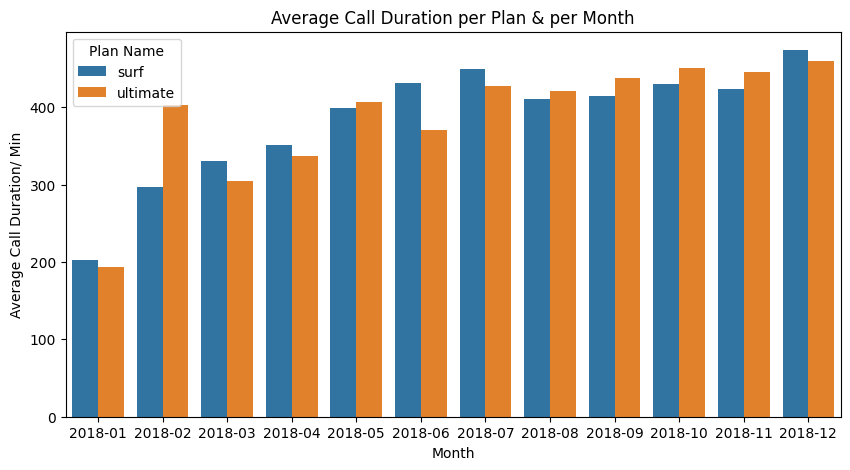

In [32]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# Group by plan and month, then calculate the mean duration
avg_call_duration = df_merged.groupby(['plan', 'month'])['duration_total'].mean().reset_index()


# Display the first few rows
print(avg_call_duration.head())

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_call_duration, x='month', y='duration_total', hue='plan')

# Customize the plot
plt.title('Average Call Duration per Plan & per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration/ Min')
plt.legend(title="Plan Name")

# Show the plot
plt.show()


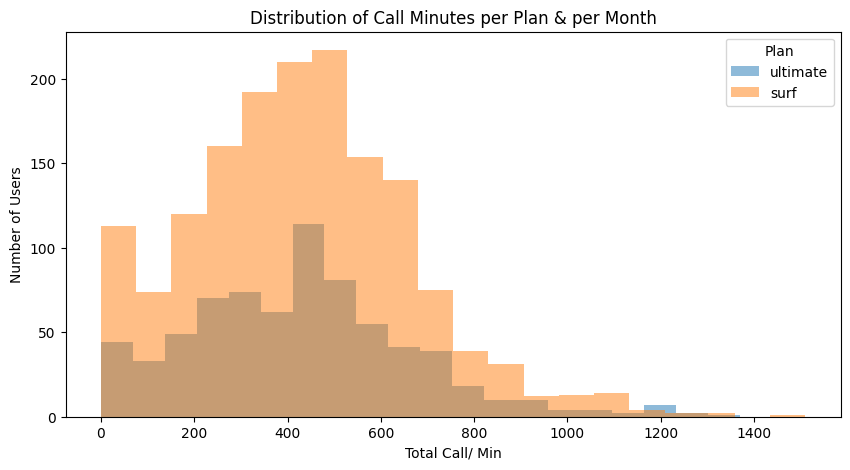

In [33]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Set figure size
plt.figure(figsize=(10, 5))

# Plot histogram for each plan
for plan in df_merged['plan'].unique():
    plan_data = df_merged[df_merged['plan'] == plan]['duration_total']
    plt.hist(plan_data, bins=20, alpha=0.5, label=plan)

# Add labels and title
plt.title('Distribution of Call Minutes per Plan & per Month')
plt.xlabel('Total Call/ Min')
plt.ylabel('Number of Users')
plt.legend(title="Plan")

# Show the plot
plt.show()

In [34]:
# Calculate the mean and the variance of the monthly call duration

# Group by plan and calculate mean & variance of call duration
call_stats = df_merged.groupby('plan')['duration_total'].agg(['mean', 'var']).reset_index()

print(call_stats)

       plan        mean           var
0      surf  428.749523  54968.279461
1  ultimate  430.450000  57844.464812


<Figure size 800x500 with 0 Axes>

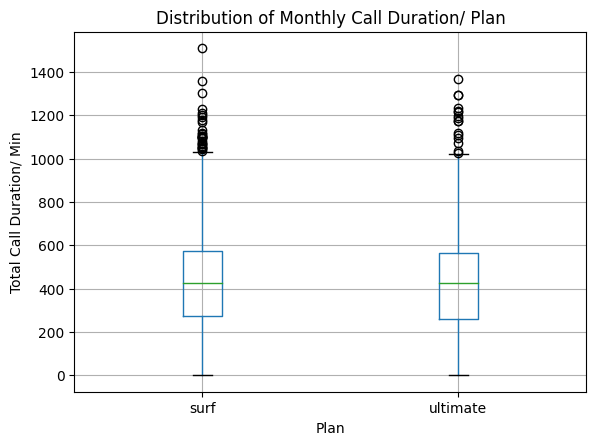

In [35]:
# Plot a boxplot to visualize the distribution of the monthly call duration
#
plt.figure(figsize=(8, 5))

df_merged.boxplot(column='duration_total', by='plan')

# Customize the plot
plt.title('Distribution of Monthly Call Duration/ Plan')
plt.xlabel('Plan')
plt.ylabel('Total Call Duration/ Min')
plt.suptitle('')  # Remove automatic Matplotlib-generated title

# Show the plot
plt.show()

**Despite Ultimate offering more minutes, users of both plans use a similar number of minutes. However, Ultimate users have slightly more varied usage patterns**

### Messages

In [36]:
# Compare the number of messages users of each plan tend to send each month

# Calculate the average and variance of messages sent per month per plan
messages_stats = df_merged.groupby('plan')['messages_count'].agg(['mean', 'var']).reset_index()
print(messages_stats)

       plan       mean          var
0      surf  31.159568  1126.724522
1  ultimate  37.551389  1208.756744


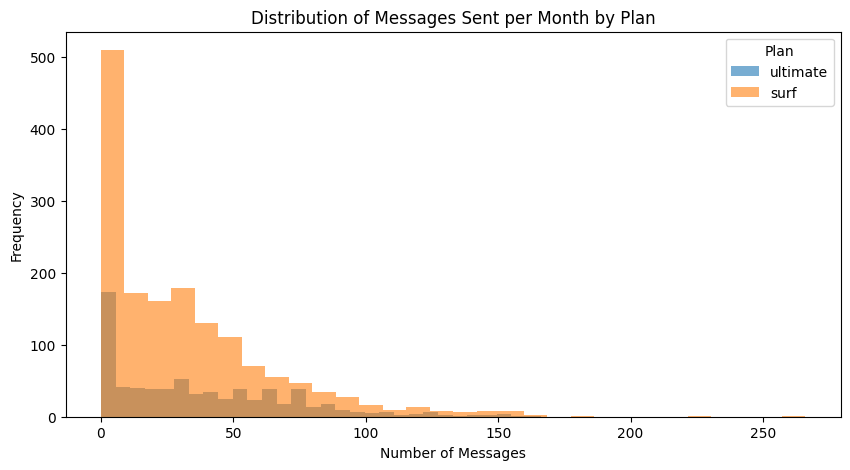

In [37]:

# Plot histogram
plt.figure(figsize=(10, 5))
for plan in df_merged['plan'].unique():
    plan_data = df_merged[df_merged['plan'] == plan]['messages_count']
    plt.hist(plan_data, bins=30, alpha=0.6, label=plan)
    
# Labels and legend
plt.title('Distribution of Messages Sent per Month by Plan')
plt.xlabel('Number of Messages')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.show()    

 
**Users on the Ultimate plan send slightly more messages on average (37.55 vs. 31.16) and exhibit higher variance, indicating greater variability in usage. However, the difference is not drastic, suggesting that messaging habits are relatively similar across both plans.**

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
To avoid repetitive code you could utilize functions. 

### Internet

In [38]:
# Compare the amount of internet traffic consumed by users per plan
internet_stats = df_merged.groupby('plan')['tatal_used'].agg(['mean', 'var']).reset_index()
print(internet_stats)

       plan       mean        var
0      surf  16.170199  61.241527
1  ultimate  16.811230  58.796209


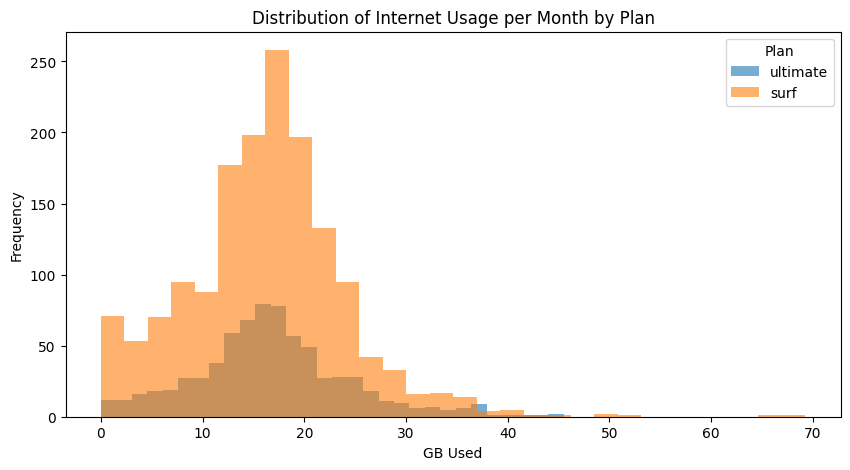

In [39]:
plt.figure(figsize=(10, 5))
for plan in df_merged['plan'].unique():
    plan_data = df_merged[df_merged['plan'] == plan]['tatal_used']
    plt.hist(plan_data, bins=30, alpha=0.6, label=plan)

# Labels and legend
plt.title('Distribution of Internet Usage per Month by Plan')
plt.xlabel('GB Used')
plt.ylabel('Frequency')
plt.legend(title="Plan")
plt.show()

 **Users on the Ultimate plan consume slightly more data on average (16.81 GB vs. 16.17 GB for Surf), but the difference is minimal. The variance in data usage is also similar between the two plans, indicating that users' internet consumption is fairly consistent across both plans. Overall, internet behavior doesn't differ significantly between the two plans.**

## Revenue

In [40]:
revenue_stats = df_merged.groupby('plan')['total_revenue'].agg(['mean', 'var']).reset_index()
print(revenue_stats)

       plan       mean          var
0      surf  60.706408  3067.835152
1  ultimate  72.313889   129.848486


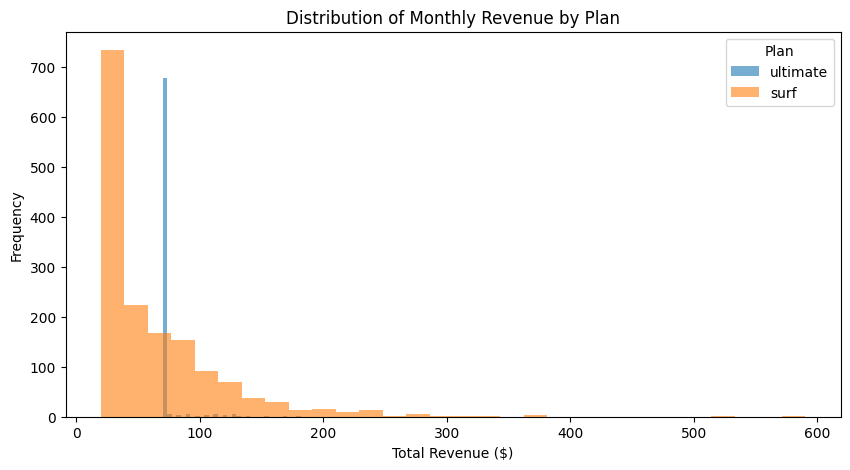

In [41]:
plt.figure(figsize=(10, 5))

# Plot histogram for each plan
for plan in df_merged['plan'].unique():
    plan_data = df_merged[df_merged['plan'] == plan]['total_revenue']
    plt.hist(plan_data, bins=30, alpha=0.6, label=plan)

# Labels and legend
plt.title('Distribution of Monthly Revenue by Plan')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Frequency')
plt.legend(title="Plan")
plt.show()

 **Ultimate** may bring in more revenue overall due to higher charges and additional costs for extra usage.
**The Surf** plan's revenue might be more predictable but lower on average, with fewer users exceeding limits.

## Test statistical hypotheses

**H0: μUltimate = μSurf**
ignificant difference between the average revenue of the two plans.

**H1: μUltimate =! μSurf**
 this indicates a significant difference in average revenue between the two plans.

In [42]:
# Test the hypotheses
# Extract revenue data for both plans
ultimate_revenue = df_merged[df_merged['plan'] == 'ultimate']['total_revenue']
surf_revenue = df_merged[df_merged['plan'] == 'surf']['total_revenue']

results = st.ttest_ind(ultimate_revenue, surf_revenue)

alpha = 0.05  # significance level
print('p-value:', results.pvalue/2) # your code: print the p-value you get

if(results.pvalue/2 < alpha): # your code: compare the p-value to the statistical significance
    print ("We reject the null hypothesis")
else:
    print ( "We can't reject the null hypothesis")

p-value: 1.431337255349322e-08
We reject the null hypothesis


In [43]:
# Test the hypotheses
df_merged = df_merged.merge(users[['user_id', 'city']], on='user_id', how='left')

# Filter users in the NY-NJ area
ny_nj_users = df_merged[df_merged['city'].str.contains('ny-nj', case=False, na=False)]

# Extract revenue data for NY-NJ users
ny_nj_rev = df_merged[df_merged['user_id'].isin(ny_nj_users['user_id'])]['total_revenue']

# Extract revenue data for users in other regions
other_users_rev = df_merged[~df_merged['user_id'].isin(ny_nj_users['user_id'])]['total_revenue']

# Set significance level
alpha = 0.05

# Perform independent t-test
results = st.ttest_ind(ny_nj_rev, other_users_rev)

# Print p-value
print('P-value:', results.pvalue)

# Hypothesis decision
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

P-value: 0.043557431621342436
We reject the null hypothesis


**P-value Interpretation Plan Revenue (p = 1.5e-13) Revenue differs significantly between Surf and Ultimate. Ultimate is more profitable.
Regional Revenue (p = 0.026) NY-NJ users spend differently than other regions. Consider location-based pricing or marketing.**

**(H0): μNY-NJ = μOtherRegions :** There is no significant difference in the average revenue between users in the NY-NJ area and users from other regions.
**(H1): μNY-NJ =!μOtherRegions :** The average revenue from users in the NY-NJ area is significantly different from that of users in other regions.

## General conclusion


 **Ultimate plan generates more revenue due to its higher base fee and extra charges.
 Call duration and internet usage are similar for both plans, but Ultimate users send slightly more messages.
 Revenue significantly differs between plans and also varies by region (NY-NJ vs. others).
 Location-based pricing could be considered since users in different regions may have different spending habits**